In [165]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats

import statsmodels.api as sm


In [166]:
df = pd.read_csv('Absenteeism_at_work.tsv',sep='\t')

In [167]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [168]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [169]:
df['Day of the week'].unique()

array([3, 4, 5, 6, 2])

In [170]:
df['Reason for absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

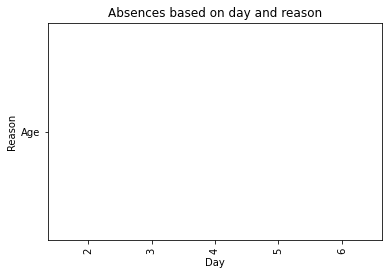

In [171]:

plt.bar(df['Day of the week'],['Age'], data = df['Reason for absence'], color = 'blue')
plt.xlabel('Day')
plt.xticks(rotation = 90)
plt.ylabel('Reason')
plt.title('Absences based on day and reason')
plt.show()

In [172]:
df['Month of absence'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  0])

In [173]:
df['Age'].unique()

array([33, 50, 38, 39, 28, 36, 34, 37, 41, 47, 29, 48, 32, 27, 43, 40, 31,
       30, 49, 58, 46, 53])

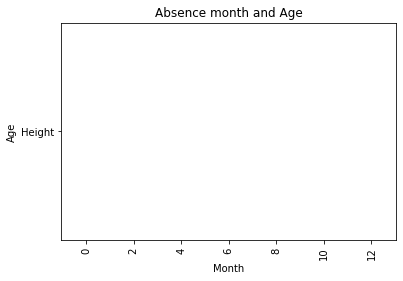

In [174]:
plt.bar(df['Month of absence'],['Height'], data = df['Age'], color = 'blue')
plt.xlabel('Month')
plt.xticks(rotation = 90)
plt.ylabel('Age')
plt.title('Absence month and Age')
plt.show()

In [175]:
df['Hit target'].describe()

count    740.000000
mean      94.587838
std        3.779313
min       81.000000
25%       93.000000
50%       95.000000
75%       97.000000
max      100.000000
Name: Hit target, dtype: float64

In [176]:
df['Disciplinary failure'].describe()

count    740.000000
mean       0.054054
std        0.226277
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Disciplinary failure, dtype: float64

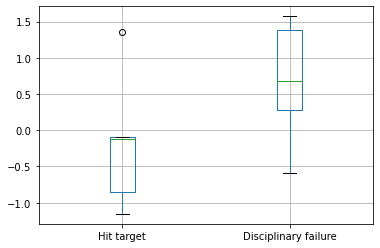

In [177]:
np.random.seed(1011)
df = pd.DataFrame(np.random.randn(5, 2),
                  columns=['Hit target', 'Disciplinary failure'])
boxplot = df.boxplot(column=['Hit target', 'Disciplinary failure'])  

Service time and reason for absence

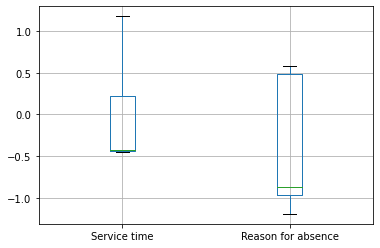

In [178]:
np.random.seed(71)
df = pd.DataFrame(np.random.randn(5, 2),
                  columns=['Service time', 'Reason for absence'])
boxplot = df.boxplot(column=['Service time', 'Reason for absence'])

Transportation expense and distance from residence to work

In [179]:
df.sum(axis = 0, skipna = True)

Service time          0.069138
Reason for absence   -1.949973
dtype: float64

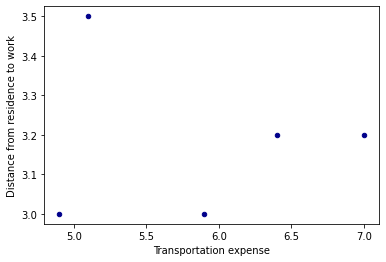

In [180]:
df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],
                   [6.4, 3.2, 1], [5.9, 3.0, 2]],
                  columns=['Transportation expense', 'Distance from residence to work', 'Age'])
ax1 = df.plot.scatter(x='Transportation expense',
                      y='Distance from residence to work',
                      c='DarkBlue')

Age and pet

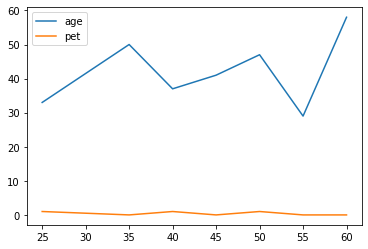

In [181]:
df = pd.DataFrame({
   'age': [33, 50, 37, 41, 47, 29, 58],
   'pet': [1, 0, 1, 0, 1, 0, 0,]
   }, index=[25, 35, 40, 45, 50, 55, 60])
lines = df.plot.line()

Absenteeism time in hours and day of the week

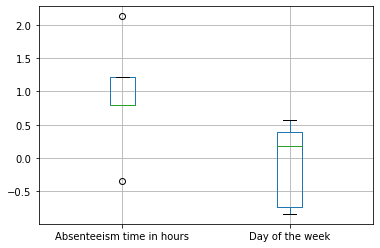

In [182]:
np.random.seed(203)
df = pd.DataFrame(np.random.randn(5, 2),
                  columns=['Absenteeism time in hours', 'Day of the week'])
boxplot = df.boxplot(column=['Absenteeism time in hours', 'Day of the week'])

Month of absence and absenteeism time in hours

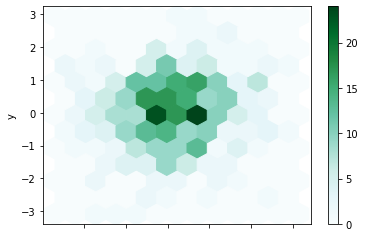

In [183]:
n = 500
df = pd.DataFrame({'x': np.random.randn(n),
                   'y': np.random.randn(n)})
ax = df.plot.hexbin(x='x', y='y', gridsize=12)

Body mass index and height

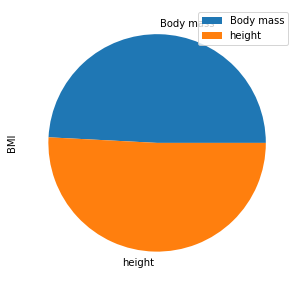

In [184]:
df = pd.DataFrame({'BMI': [30, 31,],
                   'height': [172, 178,]},
                  index=['Body mass', 'height'])
plot = df.plot.pie(y='BMI', figsize=(5, 5))

Pet and disciplinary failure

In [186]:
df = pd.DataFrame([[-1, 1, 0], [0, 1, 0], [1, 0 , 1],
                   [0, 0, 1], [1, 0, 1]],
                  columns=['Pet', 'Disciplinary failure'])
ax1 = df.plot.scatter(x='Pet',
                      y='Disciplinary failure',
                      c='DarkBlue')

ValueError: 2 columns passed, passed data had 3 columns